In [2]:
%load_ext autoreload
%autoreload 2

home_or_office = "home"

import sys
if home_or_office =="home":
    sys.path.extend(['C:\\Code\\Libraries', 'C:/Code/Libraries'])
else:
    sys.path.extend(['C:\\Users\\troy\\Documents\\Code\\Libraries', 'C:\\Users\\troy\\Documents\\Excel Sheets', 
                     'C:/Users/troy/Documents/Code/Libraries'])

from datetime import date, datetime
import os
import numpy as np
import pandas as pd
import collections

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

from tia.bbg import LocalTerminal

import FinAPI.Utilities.PlotlyCharting as plotlyUtils

pio.renderers.default = "vscode"

## Scratch for basic functions of the Live Vol Surface

#### Futures Data

In [12]:

from FinAPI import today_tz, convert_datelike_to_datetime
from dateutil.relativedelta import relativedelta

today = today_tz('USNY')
yest = today + relativedelta(days=1)
ticker = 'FVM2 Comdty'
static_fields = ['FUT_CNVS_FACTOR', 'FUT_TICK_SIZE', 'FUT_TICK_VAL', 'FUT_VAL_PT', 'LAST_TRADEABLE_DT', 'FUT_DLV_DT_FIRST', 'FUT_DLV_DT_LAST', 'FUT_FIRST_TRADE_DT']
time_series_flds = ['PX_OPEN', 'PX_HIGH', 'PX_LOW', 'PX_LAST', 'FUT_CTD_GROSS_BASIS', 'FUT_CTD_NET_BASIS', 'FUT_IMPLIED_REPO_RT', 'YLD_YTM_MID', 
                    'CONVENTIONAL_CTD_FORWARD_FRSK', 'FUT_EQV_CNVX_NOTL', 'OPEN_INT', 'PX_VOLUME']
snap_fields = ['PX_MID', "PX_VOLUME", 'OPEN_INT', 'FUT_CTD_GROSS_BASIS',
                   'FUT_CTD_NET_BASIS', 'FUT_IMPLIED_REPO_RT', 'YLD_YTM_MID', 'CONVENTIONAL_CTD_FORWARD_FRSK',
                   'FUT_EQV_CNVX_NOTL']
# fut_ts_df = LocalTerminal.get_historical(ticker, time_series_flds, history_start, history_end).as_map()[ticker]

In [34]:
# Static data
pd.Timestamp.today()

Timestamp('2022-03-30 12:02:51.861910')

In [33]:
# SNAP Live
LocalTerminal.get_reference_data(ticker, time_series_flds).as_map()[ticker]

# SNAP COB
LocalTerminal.get_historical(ticker, snap_fields, yest, yest).as_map()[ticker].iloc[0, :].to_dict()

{'PX_MID': 114.5859375,
 'PX_VOLUME': 91746.0,
 'OPEN_INT': nan,
 'FUT_CTD_GROSS_BASIS': nan,
 'FUT_CTD_NET_BASIS': nan,
 'FUT_IMPLIED_REPO_RT': nan,
 'YLD_YTM_MID': 2.851,
 'CONVENTIONAL_CTD_FORWARD_FRSK': 4.6295,
 'FUT_EQV_CNVX_NOTL': 0.2276}

In [11]:
# History
LocalTerminal.get_historical(ticker, time_series_flds, date(2022, 1, 1)).as_map()[ticker]

,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,FUT_CTD_GROSS_BASIS,FUT_CTD_NET_BASIS,FUT_IMPLIED_REPO_RT,YLD_YTM_MID,CONVENTIONAL_CTD_FORWARD_FRSK,FUT_EQV_CNVX_NOTL,OPEN_INT,PX_VOLUME
date,,,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,120.437500,-2.2507,-12.9939,0.89955,1.717,4.8982,0.2313,NaN,NaN
2022-01-04,NaN,NaN,NaN,120.429688,-2.5486,-13.4530,0.91934,1.718,4.8978,0.2313,NaN,NaN
2022-01-05,NaN,NaN,NaN,120.117188,-2.7095,-13.3217,0.93293,1.777,4.8834,0.2311,NaN,NaN
2022-01-06,NaN,NaN,NaN,119.867188,-2.9884,-13.7763,0.95386,1.824,4.8719,0.2309,NaN,NaN
2022-01-07,NaN,NaN,NaN,119.734375,-3.3010,-13.7253,0.97866,1.850,4.8658,0.2309,NaN,NaN
2022-01-10,NaN,NaN,NaN,119.562500,-3.8514,-14.1726,1.01784,1.882,4.8579,0.2307,NaN,NaN
2022-01-11,NaN,NaN,NaN,119.703125,-3.4908,-13.8864,0.99395,1.856,4.8644,0.2308,NaN,NaN
2022-01-12,NaN,NaN,NaN,119.679688,-0.8851,-11.4444,0.82052,1.860,4.8633,0.2308,NaN,NaN
2022-01-13,NaN,NaN,NaN,119.726562,-0.3490,-10.7123,0.78434,1.851,4.8655,0.2308,NaN,NaN


In [19]:
# INtraday bars
from dateutil.relativedelta import relativedelta
end = pd.Timestamp.now()
start = end + relativedelta(hours=-24*7)
LocalTerminal.get_intraday_bar(ticker, event='TRADE', start=start, end=end, interval=5).as_frame()

,time,open,high,low,close,volume,numEvents,value
0,2022-03-23 05:31:00,114.750000,114.750000,114.750000,114.750000,56,18,6426.000000
1,2022-03-23 05:36:00,114.757812,114.781250,114.757812,114.773438,934,88,107193.703125
2,2022-03-23 05:41:00,114.773438,114.773438,114.757812,114.765625,429,40,49235.132812
3,2022-03-23 05:46:00,114.765625,114.789062,114.765625,114.789062,391,70,44879.179688
4,2022-03-23 05:51:00,114.781250,114.796875,114.773438,114.796875,726,98,83335.585938
...,...,...,...,...,...,...,...,...
1285,2022-03-29 20:35:00,114.289062,114.289062,114.273438,114.273438,1853,88,211762.218750
1286,2022-03-29 20:40:00,114.273438,114.289062,114.273438,114.289062,1256,108,143535.625000
1287,2022-03-29 20:45:00,114.289062,114.289062,114.265625,114.281250,2317,145,264788.343750
1288,2022-03-29 20:50:00,114.281250,114.296875,114.273438,114.281250,2982,156,340789.125000


#### Static Data: retrieve_valid_tickers_from_bbg

In [28]:
import tia.bbg.datamgr as dm
from FinAPI.BondFutureOption.NXFreeBondFutVolSurf import StaticData, FuturesData, NxFreeBondOptSurfaceData
from FinAPI.HistoricalData.HistoryManager import BloombergHistory, BloombergStaticData

# Initialize Bloomberg
mgr = dm.BbgDataManager()
mgr.sid_result_mode = 'frame'

# Initialize Static Data
tickers = ['1MZ4C 107.5 Comdty', 'TYZ4C 107.5 Comdty', 'TYZ4C 108 Comdty', 'TYZ4C 108.5 Comdty', 'TYZ4C 109 Comdty', 'TYZ4C 109.5 Comdty']
bloomberg_expiry_field = 'last_tradeable_dt'
bloomberg_first_trade_field = 'opt_first_trade_dt'
bbg_fields = [bloomberg_expiry_field, bloomberg_first_trade_field, 'OPT_UNDL_TICKER', 'REAL_UNDERLYING_TICKER']

df = mgr.get_attributes(tickers, bbg_fields, ignore_security_error=True, ignore_field_error=True)
data = dict()
for ticker in tickers:
    d = BloombergStaticData.get_info(ticker, bbg_fields, update_from_bbg=True)
    data[ticker] = d
pd.DataFrame(data).T, df


C:\Code\Libraries\FinAPI\BondFutureOption\NXFreeBondFutVolSurf.py:1178: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

C:\Code\Libraries\FinAPI\BondFutureOption\NXFreeBondFutVolSurf.py:1179: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

C:\Code\Libraries\FinAPI\BondFutureOption\NXFreeBondFutVolSurf.py:1180: SyntaxWarning:

assertion is always true, perhaps remove parentheses?



[2023-11-16 20:24:44,121] ERROR [HistoryManager] [HistoryManager.py] [get_info][1059] [PID:27200 TID:23488] FieldError: (1MZ4C 107.5 Comdty, REAL_UNDERLYING_TICKER, BAD_FLD, Field not applicable to security)
[2023-11-16 20:24:45,227] ERROR [HistoryManager] [HistoryManager.py] [get_info][1059] [PID:27200 TID:23488] FieldError: (TYZ4C 107.5 Comdty, REAL_UNDERLYING_TICKER, BAD_FLD, Field not applicable to security)
[2023-11-16 20:24:47,168] ERROR [HistoryManager] [HistoryManager.py] [get_info][1059] [PID:27200 TID:23488] FieldError: (TYZ4C 108 Comdty, REAL_UNDERLYING_TICKER, BAD_FLD, Field not applicable to security)
[2023-11-16 20:24:48,779] ERROR [HistoryManager] [HistoryManager.py] [get_info][1059] [PID:27200 TID:23488] FieldError: (TYZ4C 108.5 Comdty, REAL_UNDERLYING_TICKER, BAD_FLD, Field not applicable to security)
[2023-11-16 20:24:50,252] ERROR [HistoryManager] [HistoryManager.py] [get_info][1059] [PID:27200 TID:23488] FieldError: (TYZ4C 109 Comdty, REAL_UNDERLYING_TICKER, BAD_FLD

(Empty DataFrame
 Columns: []
 Index: [1MZ4C 107.5 Comdty, TYZ4C 107.5 Comdty, TYZ4C 108 Comdty, TYZ4C 108.5 Comdty, TYZ4C 109 Comdty, TYZ4C 109.5 Comdty],
                    last_tradeable_dt opt_first_trade_dt OPT_UNDL_TICKER  \
 1MZ4C 107.5 Comdty        2014-12-05         2014-11-10           1MZ14   
 TYZ4C 107.5 Comdty        2014-11-21         2013-08-26           TYZ14   
 TYZ4C 108 Comdty          2014-11-21         2013-08-26           TYZ14   
 TYZ4C 108.5 Comdty        2014-11-21         2013-08-26           TYZ14   
 TYZ4C 109 Comdty          2014-11-21         2013-08-26           TYZ14   
 TYZ4C 109.5 Comdty        2014-11-21         2013-08-26           TYZ14   
 
                     REAL_UNDERLYING_TICKER  
 1MZ4C 107.5 Comdty                     NaN  
 TYZ4C 107.5 Comdty                     NaN  
 TYZ4C 108 Comdty                       NaN  
 TYZ4C 108.5 Comdty                     NaN  
 TYZ4C 109 Comdty                       NaN  
 TYZ4C 109.5 Comdty               

## Object Methods

In [3]:
from FinAPI.BondFutureOption.NXFreeBondFutVolSurf import StaticData, FuturesData, NxFreeBondOptSurfaceData

today = date(2023, 11, 23)
yest = date(2023, 11, 22)
future_code = "FVZ23"

### Futures Object and Functions

In [4]:
# create the futures object, the second argument is to update hitory
objFut = FuturesData(future_code, True)

# Properties - live current values of the snap
print(objFut.snap_mid, objFut.fwddv01, objFut.spotdv01, objFut.ytm, objFut.open_interest, objFut.volume)

# For getting a historical snap - First snap the market at the particular date
hist_snap = objFut.snap(data_dt=datetime(2023, 4, 15))

# Then use the same properties as above to access the values of the snap
print(objFut.snap_mid, objFut.fwd_dv01, objFut.ytm, objFut.open_interest, objFut.volume)

# History Dataframe
hist_df = objFut.price_candles

[2023-11-23 22:33:47,549] DEBUG [HistoryManager] [HistoryManager.py] [update_history_csv][479] [PID:11784 TID:8776] BloombergHistory: Updating History for bbg ticker: FVZ23 COMDTY
[2023-11-23 22:33:47,574] DEBUG [HistoryManager] [HistoryManager.py] [update_history_csv][499] [PID:11784 TID:8776] --- using def_start , start and end dates as 2023-03-31 00:00:00, 2023-06-29 00:00:00 and 2023-11-23
[2023-11-23 22:33:47,575] DEBUG [HistoryManager] [HistoryManager.py] [update_history_csv][543] [PID:11784 TID:8776] Data Present, trying to download missing data before the cached start_date - start and end dates as 2023-03-31 00:00:00, 2023-06-29 00:00:00
[2023-11-23 22:33:47,577] DEBUG [HistoryManager] [HistoryManager.py] [update_history_csv][551] [PID:11784 TID:8776] No missing data before the cached start
[2023-11-23 22:33:49,022] DEBUG [HistoryManager] [HistoryManager.py] [update_history_csv][580] [PID:11784 TID:8776] Data Present, trying to download data after the cached end date - start an

105.67578125 3.9947313346475464 4.092035386900987 0.04537071884435136 3928061 313889.0
105.67578125 <bound method USBondFuturesSingleCTDPricerQL.fwd_dv01 of <FinAPI.BondFutureOption.NXFreeBondFutVolSurf.FuturesData object at 0x0000028D43883610>> 0.04537071884435136 3928061 313889.0


In [5]:
df = hist_df.dropna()
# get the cart
fig = plotlyUtils.create_candlestick(hist_df, ohlc_cols=['OPEN', 'HIGH', 'LOW', 'CLOSE'])
# plot the chart
fig.show()

In [6]:
# Debug Print
objFut.debug_print()

----- Raw SNAP ------
{'PX_OPEN': 105.609375, 'PX_HIGH': 106.0390625, 'PX_LOW': 105.578125, 'PX_LAST': 105.9609375, 'PX_VOLUME': 1078113.0, 'OPEN_INT': 5954453, 'FUT_CTD_CUSIP': '91282CGP0', 'FUT_CNVS_FACTOR': 0.9272, 'FUT_IMPLIED_REPO_RT': 4.219511824415534, 'FUT_ACTUAL_REPO_RT': 5.406, 'CONVENTIONAL_CTD_FORWARD_FRSK': 4.007390784692505, 'VALUE_DT': Timestamp('2023-11-16 00:00:00'), 'PRICE': 105.96484375}
------- Indiv Properties ------
105.96484375 4.007564218156909 4.1221002883328 0.044648269175610045 4.219511824415534 5954453 1078113.0


### Future Option Surface

In [10]:
from FinAPI.HistoricalData.HistoryManager import BloombergHistory, BloombergStaticData

BloombergStaticData.get_info(future_code + '  Comdty', 'TICKER')

{'TICKER': 'FVZ3'}

In [11]:
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

objSurf = NxFreeBondOptSurfaceData(future_code, today)

[2023-11-17 04:04:17,137] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][1277] [PID:3904 TID:26248] Initialization Parameters: FVZ23, 2023-11-16, 50
[2023-11-17 04:04:18,544] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][1277] [PID:3904 TID:26248] Futures Object loaded sucessfully - Futures Code: FVZ3
[2023-11-17 04:04:18,552] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][1277] [PID:3904 TID:26248] Data Date: 2023-11-16
[2023-11-17 04:04:18,555] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][1277] [PID:3904 TID:26248] Price Mode: LIVE
[2023-11-17 04:04:18,558] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][1277] [PID:3904 TID:26248] Price Field: PX_MID
[2023-11-17 04:04:21,315] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][1277] [PID:3904 TID:26248] Fut Price Ref: 105.96484375
[2023-11-17 04:04:21,320] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [retrive_valid_tickers_from_bbg][970] [PID:3904 TID:26248] 


In [16]:
objSurf.MarketData.valid_xpiries

,last_tradeable_dt,opt_first_trade_dt,OPT_UNDL_TICKER,REAL_UNDERLYING_TICKER,expiry_type,strike_spread,tickers,days_to_expiry,year_fracs,exp_code,disc_fact
2023-11-17,2023-11-17,2023-10-23,3IZ3,FVZ3,Friday Weekly,0.25,3IX3P 106 Comdty,1,0.002740,3IX3,0.999854
2023-11-22,2023-11-22,2023-11-09,FVWZ3,FVZ3,Wednesday Weekly,0.25,FVWX23C4 106 Comdty,6,0.016438,W_X23_4,0.999124
2023-11-24,2023-11-24,2023-04-03,FVZ3,FVZ3,Serial Quarterly,0.25,FVZ3P 106 Comdty,8,0.021918,FVZ3,0.998833


In [3]:
objSurf.FutureCodes.snap(today)
objFut = objSurf.FutureCodes

----- Raw SNAP ------
{'PX_OPEN': 114.4921875, 'PX_HIGH': 114.5078125, 'PX_LOW': 113.84375, 'PX_LAST': 114.0234375, 'PX_VOLUME': 1314357.0, 'PX_MID': 113.9453125, 'OPEN_INT': 3756837.0, 'FUT_CTD_GROSS_BASIS': 2.2772, 'FUT_CTD_NET_BASIS': -1.4819, 'FUT_IMPLIED_REPO_RT': 0.49605, 'CTD_FORWARD_YTM_LAST': 2.742, 'CONVENTIONAL_CTD_FORWARD_FRSK': 4.6042, 'FUT_EQV_CNVX_NOTL': 0.2273}
------- Indiv Properties ------
114.0234375 4.6042 0.2273 2.742 0.49605 -1.4819 2.2772 3756837.0 1314357.0
----- Price / Yield Relationship ----
1st target 114.5 2.63831 2.6387570711487203 114.49962743349832
2nd target 115 2.53049 2.5309964557651523 114.9921923484522
3rd target 114.25 2.69242 2.6928518366586442 114.25143549084137
4th target 115.25 2.47678 2.477328353523495 115.23657512374352


In [4]:
objSurf.update_price_from_bbg()

[2022-04-12 21:51:05,897] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][626] [PID:1660 TID:31508] Running Update ...
[2022-04-12 21:51:06,931] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][626] [PID:1660 TID:31508]  - Futures Snapped ...
[2022-04-12 21:51:09,116] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][626] [PID:1660 TID:31508]  - Option Data Snapped ...
[2022-04-12 21:51:09,123] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][626] [PID:1660 TID:31508]  - Option Data Cleaned ...
[2022-04-12 21:51:11,163] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][626] [PID:1660 TID:31508]  - IR Data Snapped ...


<Axes: >

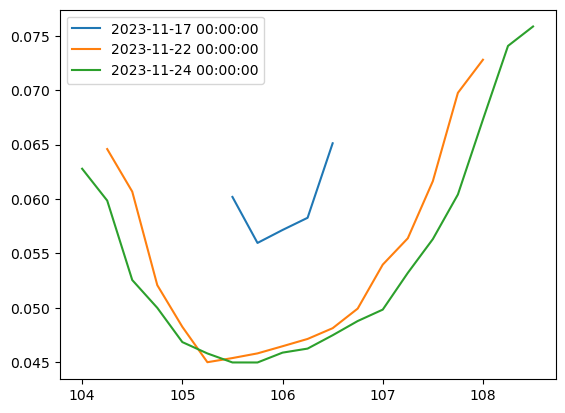

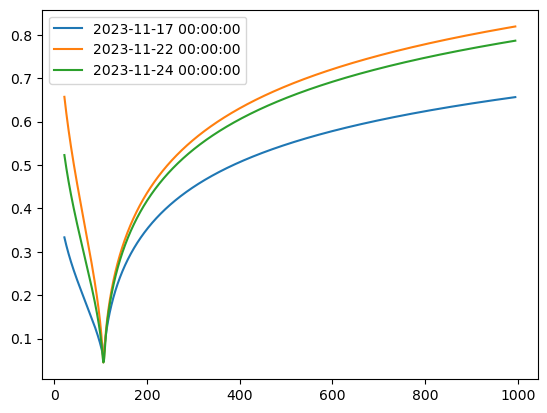

In [12]:
objSurf.MarketData.pricevol_lognormal.T.plot()
objSurf.MarketData.smooth_pricevol_lognormal.T.plot()

<Axes: >

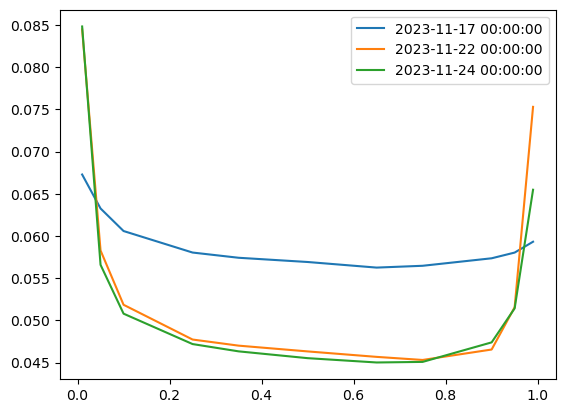

In [13]:
objSurf.get_skew_surface(typ="DELTA", vol_typ="RAW").T.plot()

In [14]:
objSurf.get_greek_surface(greek_name="GAMMA", typ="DELTA",opt_type="CALL")

,0.01,0.05,0.10,0.25,0.35,0.50,0.65,0.75,0.90,0.95,0.99
2023-11-17,0.071411,0.293905,0.522168,0.987015,1.162849,1.263486,1.186910,1.014414,0.551560,0.320359,0.080993
2023-11-22,0.023204,0.130133,0.248898,0.489556,0.579400,0.633256,0.596277,0.515687,0.277235,0.147103,0.026032
2023-11-24,0.020008,0.116050,0.219957,0.428665,0.508957,0.557880,0.523849,0.448745,0.235735,0.127689,0.025916


array([0])

## Surface Factory Methods

#### Methods Scratch

In [5]:
from FinAPI.BondFutureOption.NXFreeBondFutVolSurf import SurfaceFactory, NxFreeBondOptSurfaceData

objFactory = SurfaceFactory()
self = objFactory

# Initialization Function
data_dt = date(2022, 5, 19)
objFactory.initialize_surfaces(data_dt)


[2022-05-19 13:02:22,119] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][1535] [PID:32668 TID:32680] Loading for Future Code - TU
[2022-05-19 13:02:22,120] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][1535] [PID:32668 TID:32680]  -- Future Codes: TUM2, TUU2
[2022-05-19 13:02:25,378] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [_retrive_valid_tickers_from_bbg][700] [PID:32668 TID:32680] 
C:\Users\troy\Documents\Code\Libraries\FinAPI\DataAnalysis\SplineSmoothing.py:614: RuntimeWarning: invalid value encountered in double_scalars
  gcv_val = (self.rss(lamda, cv=True) / (trP ** 2))
C:\Users\troy\Documents\Code\Libraries\FinAPI\BondFutureOption\SkewModel.py:677: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(total_imp_variance / self.day_count_fraction_)
C:\Users\troy\Documents\Code\Libraries\FinAPI\BondFutureOption\SkewModel.py:677: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(total_imp_variance / self.day_count_fra

##### Phase 1 -- Basic Metrics + Structure Pricing
---------------------------------------------------------------------------------------------
1. **Vol Term Structure**
   * ~~ATM Vol~~
   * ~~Same Strike Vol~~
   * ~~Same Moneyness Vol, moneyness to strike, then use strike vol~~
   * ~~Same log-moneyness vol, log_moneyness to strike, then use strike vol~~
   * ~~Same Delta Vol~~

2. **Skew Term Structure**
   * dsigma/dK[ATM]
   * sigma(25P) - sigma(25C),  ATM, abs strike, moneyness strike, log_moneyness strike
   * curv(25P) - curv(25C)

3. **Curvature Term Structure**
   * same variations as skew

4. **Digital Term Structure**
   * Same variations as the skew
   * 
5. **Sigma Surface**
   * ATM, Abs Strike, Log Moneyness, Moneyness, Delta

6. **dSigma/dK Surface**
   * ATM, Abs Strike, Log Moneyness, Moneyness, Delta
   
7. **Digital Surface**
   * ATM, Abs Strike, Log Moneyness, Moneyness, Delta

8. **Pricing of Bond Options / Structure and Analysis (Scenario, Vol shock etc), history from BBG direct**
   -> Individual

9. **Blotter with alert mechanism**

##### Phase 2-> structure scanner
----------------------------------------------------------------------------------------------

# Adapt the VIX structure scanner for the producing structure reports
# Combine with the knowledge of digitals etc.
# Physical districution / Time series vs. Structure

# ----------------------------------------------------------------------------------------------
# Pase 3 -> Realized volatility and macro range and scenario based structure analysis
# ----------------------------------------------------------------------------------------------
#   Realized vol vs. Implied Vol
#   Pricing of Jump risk
#   Macro range vs. Implied distribution
#   Probabilities of macro scenarios
#   Scenario Probablity RV
#   Chnage in future / skew for different re-pricing of the implied distribution
#   How does Vol-vol, skew and ATM get priced for different repricing of the distribution


# -----------------------------------------------------------------------------------------------
# Phase 3 -> Time Series of Skews and Vols
# -----------------------------------------------------------------------------------------------

* Time Series of the skews, vols
    -> 

 * Structure Scans

#### Static Data (For excel)

In [126]:
from FinAPI.BondFutureOption.NXFreeBondFutVolSurf import FuturesData
# Fut Static df
self = objFactory
self.get_fut_static_df()


,Last Delivery Date,First Delivery Date,CTD Conversion Factor,CTD ISIN,PX,CTD Coupon,CTD Maturity,CTD Accrual Date
TUM2,2022-07-06,2022-06-01,0.9385,US91282CEG24,105.625000,0.02250,2024-03-31,2022-03-31
TUU2,2022-10-05,2022-09-01,0.9303,US9128286Z85,105.226562,0.01750,2024-06-30,2019-06-30
FVM2,2022-07-06,2022-06-01,0.8089,US91282CCW91,113.218750,0.00750,2026-08-31,2021-08-31
FVU2,2022-10-05,2022-09-01,0.8271,US91282CDK45,112.812500,0.01250,2026-11-30,2021-11-30
TYM2,2022-06-30,2022-06-01,0.8205,US9128286B18,120.046875,0.02625,2029-02-15,2019-02-15
TYU2,2022-09-30,2022-09-01,0.8338,US91282CEM91,119.625000,0.02875,2029-04-30,2022-04-30
USM2,2022-06-30,2022-06-01,0.8375,US912810PW27,142.437500,0.04375,2038-02-15,2008-02-15
USU2,2022-09-30,2022-09-01,0.8390,US912810PW27,141.468750,0.04375,2038-02-15,2008-02-15


#### Term Structure Functions for Excel

<AxesSubplot:>

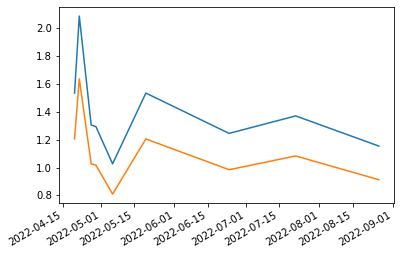

In [119]:
# ATM vol Term Structure
def get_atmvol_termstructure(self, base_ticker):
    atm_vol_df = None
    for fut_code, objSurf in self.objSurfaces[base_ticker].items():
        expiries = objSurf.MarketData.valid_xpiries.sort_index().index.values
        if atm_vol_df is not None:
            atm_vol_df = atm_vol_df.reindex(np.union1d(atm_vol_df.index, expiries))
        else:
            atm_vol_df = pd.DataFrame(index=expiries)
        atm_vol_df.loc[expiries, "FUT CODE"] = fut_code
        atm_vol_df.loc[expiries, "ATM STRIKE"] = objSurf.MarketData.ref_fut_price
        atm_vol_df.loc[expiries, "ATM VOL"] = [objSurf.get_smooth_interpolated_vol(pd.to_datetime(exp_dt), objSurf.MarketData.ref_fut_price) for exp_dt in expiries]
    return atm_vol_df

# Const Delta Vol Term Structure
def get_constdelta_voltermstruc(self, base_ticker, call_delta_val):
    call_delta = call_delta_val
    delta_vol_df = None
    for fut_code, objSurf in self.objSurfaces[base_ticker].items():
        expiries = objSurf.MarketData.valid_xpiries.sort_index().index.values
        if delta_vol_df is not None:
            delta_vol_df = delta_vol_df.reindex(np.union1d(delta_vol_df.index, expiries))
        else:
            delta_vol_df = pd.DataFrame(index=expiries)
        delta_vol_df.loc[expiries, "FUT CODE"] = fut_code
        delta_vol_df.loc[expiries, "DELTA"] = call_delta
        delta_vol_df.loc[expiries, "STRIKE"] = [objSurf.get_fwd_call_delta_strike(pd.to_datetime(exp_dt), call_delta) for exp_dt in expiries]
        delta_vol_df.loc[expiries, "STRIKE VOL"] = [objSurf.get_smooth_interpolated_vol(pd.to_datetime(exp_dt), delta_vol_df.loc[pd.to_datetime(exp_dt), "STRIKE"]) for exp_dt in expiries]
    return delta_vol_df  

# Constant Strike
def get_conststrike_voltermstruc(self, base_ticker, abs_strike):
    delta_vol_df = None
    for fut_code, objSurf in self.objSurfaces[base_ticker].items():
        expiries = objSurf.MarketData.valid_xpiries.sort_index().index.values
        if delta_vol_df is not None:
            delta_vol_df = delta_vol_df.reindex(np.union1d(delta_vol_df.index, expiries))
        else:
            delta_vol_df = pd.DataFrame(index=expiries)
        delta_vol_df.loc[expiries, "FUT CODE"] = fut_code
        delta_vol_df.loc[expiries, "ATM"] = objSurf.MarketData.ref_fut_price
        delta_vol_df.loc[expiries, "STRIKE VOL"] = [objSurf.get_smooth_interpolated_vol(pd.to_datetime(exp_dt),
                                                                                        abs_strike) for exp_dt in
                                                    expiries]
    return delta_vol_df

# Const Moneyness
def get_constmoneyness_voltermstruc(self, base_ticker, moneyness):
    delta_vol_df = None
    for fut_code, objSurf in self.objSurfaces[base_ticker].items():
        expiries = objSurf.MarketData.valid_xpiries.sort_index().index.values
        if delta_vol_df is not None:
            delta_vol_df = delta_vol_df.reindex(np.union1d(delta_vol_df.index, expiries))
        else:
            delta_vol_df = pd.DataFrame(index=expiries)
        delta_vol_df.loc[expiries, "FUT CODE"] = fut_code
        delta_vol_df.loc[expiries, "ATM"] = objSurf.MarketData.ref_fut_price
        delta_vol_df.loc[expiries, "STRIKE"] = objSurf.MarketData.ref_fut_price * moneyness
        delta_vol_df.loc[expiries, "STRIKE VOL"] = [objSurf.get_smooth_interpolated_vol(pd.to_datetime(exp_dt), 
                                                                                        delta_vol_df.loc[pd.to_datetime(exp_dt), "STRIKE"]) 
                                                    for exp_dt in expiries]
    return delta_vol_df

# Constant LogMOneyness
def get_constmoneyness_voltermstruc(self, base_ticker, log_moneyness):
    delta_vol_df = None
    for fut_code, objSurf in self.objSurfaces[base_ticker].items():
        expiries = objSurf.MarketData.valid_xpiries.sort_index().index.values
        if delta_vol_df is not None:
            delta_vol_df = delta_vol_df.reindex(np.union1d(delta_vol_df.index, expiries))
        else:
            delta_vol_df = pd.DataFrame(index=expiries)
        delta_vol_df.loc[expiries, "FUT CODE"] = fut_code
        delta_vol_df.loc[expiries, "ATM"] = objSurf.MarketData.ref_fut_price
        delta_vol_df.loc[expiries, "STRIKE"] = objSurf.MarketData.ref_fut_price * np.exp(log_moneyness)
        delta_vol_df.loc[expiries, "STRIKE VOL"] = [objSurf.get_smooth_interpolated_vol(pd.to_datetime(exp_dt), 
                                                                                        delta_vol_df.loc[pd.to_datetime(exp_dt), "STRIKE"]) 
                                                    for exp_dt in expiries]
    return delta_vol_df

self = objFactory
base_ticker = "US" 
call_delta = 0.95

atm_vol_df = get_atmvol_termstructure(self, base_ticker)
delta_vol_df = get_constdelta_voltermstruc(self, base_ticker, call_delta)
strike_vol_df = get_conststrike_voltermstruc(self, base_ticker, 114)
moneyness_vol_df = get_conststrike_voltermstruc(self, base_ticker, 1.05)
log_moneyness_vol_df = get_conststrike_voltermstruc(self, base_ticker, np.log(1.05))
log_moneyness_vol_df['STRIKE VOL'].plot()
moneyness_vol_df['STRIKE VOL'].plot()

#### Pricing Functions for Excel

In [168]:
# Delta skew, % skew
# dsigma_dK, d2sigma_dK2
# digital term structure
# 
exp_dt = "FVM2"
strikes = np.float64(139)
opt_type = "C"

self = objFactory.objSurfaces['FV'][exp_dt]
exp_dt = datetime(2022, 5, 20)
strikes = [strikes]

skew_mod = self.SURFACE_INTERPOLATOR.skew_dict[exp_dt]
skew_mod.price(strikes[0], "C")

1.2238367379708258e-20

In [181]:
# Pricing of Bond Options / Structure and Analysis (Scenario, Vol shock etc), history from BBG direct
self = objFactory

future_code = "TYM2"



objSurf = objFactory.objSurfaces[future_code[:2]][future_code]
expiry_codes = objSurf.MarketData.valid_xpiries.exp_code
expiry_dates = objSurf.MarketData.valid_xpiries.index.values

# expiry_code_to_date(objSurf, "1MK2")
objSurf.MarketData.price_dataset

,115.25,115.50,115.75,116.00,116.25,116.50,116.75,117.00,117.25,117.50,...,120.25,120.50,120.75,121.00,121.25,121.50,121.75,122.00,122.25,122.50
2022-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015625,...,0.015625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-13,NaN,NaN,NaN,NaN,NaN,0.015625,0.015625,0.03125,0.046875,0.078125,...,0.046875,0.031250,0.03125,0.015625,0.015625,0.015625,0.015625,NaN,NaN,NaN
2022-05-18,NaN,0.015625,0.03125,0.031250,0.03125,0.046875,0.062500,0.09375,0.109375,0.156250,...,0.109375,0.078125,0.06250,0.046875,0.046875,0.031250,0.031250,0.015625,0.015625,0.015625
2022-05-20,0.015625,0.015625,0.03125,0.046875,0.06250,0.078125,0.093750,0.12500,0.156250,0.203125,...,0.156250,0.125000,0.09375,0.062500,0.046875,0.046875,0.046875,0.031250,0.031250,0.031250


##### Object Method Testing